In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('data/rawdata_무채색유채색 통합.xlsx')
df.head()

q1  q2_1  q3  q5  I_E  S_N  T_F  J_P  q7  q8  q9  q10  q11_1  q11_3  q12_1  \
0   2    33   2  11    0    0    0    1   1   2   2    4    NaN    NaN    1.0   
1   2    35   2  10    1    0    1    1   3   3   5    2    1.0    3.0    1.0   
2   2    24   1   3    0    1    1    0   1   5   3    4    1.0    NaN    1.0   
3   2    32   2   2    1    1    1    1   2   4   3    2    1.0    3.0    NaN   
4   2    39   2  11    0    0    0    1   1   5   2    2    1.0    3.0    NaN   

   q11_4  q11_6  q12_2  q12_5  q11_5  q11_8  q12_4  q11_7  q12_3  q12_6  \
0    NaN    NaN    NaN    NaN    5.0    NaN    4.0    NaN    NaN    6.0   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    8.0    NaN    7.0    NaN    NaN   
3    NaN    NaN    NaN    NaN    5.0    NaN    4.0    7.0    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    4.0    NaN    NaN    NaN   

   target_group  q13_1  q14_1  q14_2  q14_3  q14_4  q14_5  q14_6  q14_7  \
0             3    240      0      1      1      0      0      0      0   
1             1    250      0      0      0      0      0      0      0   
2             4    250      0      0      0      0      0      0      0   
3             3    235      0      0      0      0      0      0      0   
4             3    240      0      0      0      0      0      0      0   

   q14_8  q14_9  q14_10  q14_11  q15  q16  q17  q18  q19  q21  q22  q23  q37  \
0      1      0       0       0    2    2    1    1    1    1    2    3    2   
1      0      0       0       1    2    1    1    1    1    2    3    3    2   
2      0      0       0       1    2    1    1    1    1    1    4    3    2   
3      0      0       0       1    2    1    1    1    1    1    3    3    2   
4      0      0       0       1    2    1    1    1    1    1    2    4    1   

   q38  q39  q40  q41  개성지향  과시지향  운동지향  SNS활동_자기표현  SNS활동_시간  의복추구혜택_실용성  \
0    5    4    2    1  3.00  2.67  3.00         1.0       3.0         4.0   
1    2    4    1    1  2.67  2.33  2.33         2.6       3.5         3.0   
2    5    1    1    3  3.67  3.33  3.67         3.0       4.0         4.0   
3    1    4    1    1  3.00  3.00  2.33         3.2       3.5         3.0   
4    3    4    2    3  3.00  2.33  3.33         1.0       1.0         5.0   

   의복추구혜택_유행스타일추구  의복추구혜택_외모추구  패션관여도  
0            2.75         3.67    3.4  
1            2.50         3.00    2.4  
2            2.50         3.33    3.2  
3            2.50         4.33    4.0  
4            1.50         3.33    2.0

In [4]:
null_counts = df.isnull().sum()
print(null_counts)

q1                  0
q2_1                0
q3                  0
q5                  0
I_E                 0
S_N                 0
T_F                 0
J_P                 0
q7                  0
q8                  0
q9                  0
q10                 0
q11_1             217
q11_3             254
q12_1             219
q11_4             406
q11_6             428
q12_2             384
q12_5             429
q11_5             401
q11_8             369
q12_4             358
q11_7             336
q12_3             371
q12_6             374
target_group        0
q13_1               0
q14_1               0
q14_2               0
q14_3               0
q14_4               0
q14_5               0
q14_6               0
q14_7               0
q14_8               0
q14_9               0
q14_10              0
q14_11              0
q15                 0
q16                 0
q17                 0
q18                 0
q19                 0
q21                 0
q22                 0
q23       

In [5]:
# NaN 값 0으로 채우기
df = df.fillna(0)

In [6]:
X = df.drop(['target_group'], axis=1) 
y = df['target_group']


In [7]:
# min-Max 정규화
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()

# 데이터 프레임을 정규화
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_norm.head()

q1      q2_1   q3        q5  I_E  S_N  T_F  J_P    q7    q8    q9   q10  \
0  1.0  0.448276  0.5  0.666667  0.0  0.0  0.0  1.0  0.00  0.25  0.25  0.75   
1  1.0  0.517241  0.5  0.600000  1.0  0.0  1.0  1.0  0.50  0.50  1.00  0.25   
2  1.0  0.137931  0.0  0.133333  0.0  1.0  1.0  0.0  0.00  1.00  0.50  0.75   
3  1.0  0.413793  0.5  0.066667  1.0  1.0  1.0  1.0  0.25  0.75  0.50  0.25   
4  1.0  0.655172  0.5  0.666667  0.0  0.0  0.0  1.0  0.00  1.00  0.25  0.25   

   q11_1  q11_3  q12_1  q11_4  q11_6  q12_2  q12_5  q11_5  q11_8  q12_4  \
0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
1    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
3    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
4    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   

   q11_7  q12_3  q12_6   q13_1  q14_1  q14_2  q14_3  q14_4  q14_5  q14_6  \
0    0.0    0.0    1.0  0.3750    0.0    1.0    1.0    0.0    0.0    0.0   
1    0.0    0.0    0.0  0.5000    0.0    0.0    0.0    0.0    0.0    0.0   
2    1.0    0.0    0.0  0.5000    0.0    0.0    0.0    0.0    0.0    0.0   
3    1.0    0.0    0.0  0.3125    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0  0.3750    0.0    0.0    0.0    0.0    0.0    0.0   

   q14_7  q14_8  q14_9  q14_10  q14_11       q15  q16  q17  q18  q19  q21  \
0    0.0    1.0    0.0     0.0     0.0  0.333333  1.0  0.0  0.0  0.0  0.0   
1    0.0    0.0    0.0     0.0     1.0  0.333333  0.0  0.0  0.0  0.0  1.0   
2    0.0    0.0    0.0     0.0     1.0  0.333333  0.0  0.0  0.0  0.0  0.0   
3    0.0    0.0    0.0     0.0     1.0  0.333333  0.0  0.0  0.0  0.0  0.0   
4    0.0    0.0    0.0     0.0     1.0  0.333333  0.0  0.0  0.0  0.0  0.0   

    q22   q23  q37   q38  q39  q40  q41    개성지향    과시지향    운동지향  SNS활동_자기표현  \
0  0.25  0.50  1.0  1.00  1.0  0.5  0.0  0.5000  0.4175  0.5000        0.00   
1  0.50  0.50  1.0  0.25  1.0  0.0  0.0  0.4175  0.3325  0.3325        0.40   
2  0.75  0.50  1.0  1.00  0.0  0.0  1.0  0.6675  0.5825  0.6675        0.50   
3  0.50  0.50  1.0  0.00  1.0  0.0  0.0  0.5000  0.5000  0.3325        0.55   
4  0.25  0.75  0.0  0.50  1.0  0.5  1.0  0.5000  0.3325  0.5825        0.00   

   SNS활동_시간  의복추구혜택_실용성  의복추구혜택_유행스타일추구  의복추구혜택_외모추구  패션관여도  
0     0.500    0.692308          0.4375       0.6675   0.60  
1     0.625    0.384615          0.3750       0.5000   0.35  
2     0.750    0.692308          0.3750       0.5825   0.55  
3     0.625    0.384615          0.3750       0.8325   0.75  
4     0.000    1.000000          0.1250       0.5825   0.25

In [8]:
# y histogram
import plotly.express as px

fig = px.histogram(y)
fig.update_layout(width=800, height =500)
fig.show()

In [9]:
# 학습용과 테스트용으로 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 결정 트리 분류기
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [11]:
# Decision-Tree 훈련
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Random Forest 훈련
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(np.unique(y_pred))
print(np.unique(rf_pred))

[1 2 3 4]
[1 2 3 4]


In [14]:
from sklearn.metrics import accuracy_score

accuracy = dt.score(X_test, y_test)
accuracy_rf = rf.score(X_test, y_test)

print('DT train Accuracy', dt.score(X_train, y_train))
print('DT Accuracy :', accuracy)

print('rf train Accuracy', rf.score(X_train, y_train))
print('rf Accuracy :', accuracy_rf)

DT train Accuracy 1.0
DT Accuracy : 0.8666666666666667
rf train Accuracy 1.0
rf Accuracy : 0.9


In [15]:
import matplotlib.font_manager as fm

# 한글 폰트 경로
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로

# 한글 폰트 등록
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [16]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)
unique_labels

array([1, 2, 3, 4], dtype=int64)

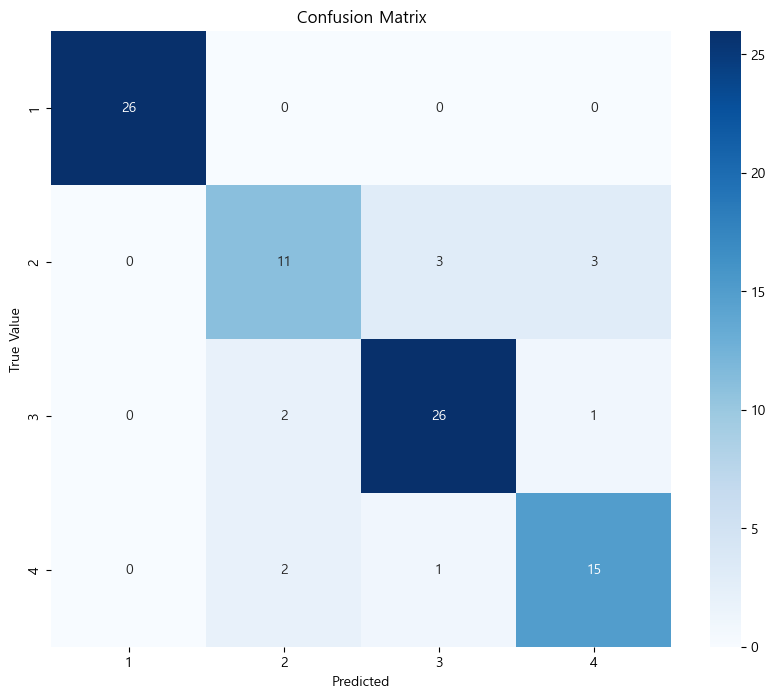

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
           xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.savefig('images/confusionMatrix_over80.jpg')
plt.show()

<Figure size 12800x9600 with 0 Axes>

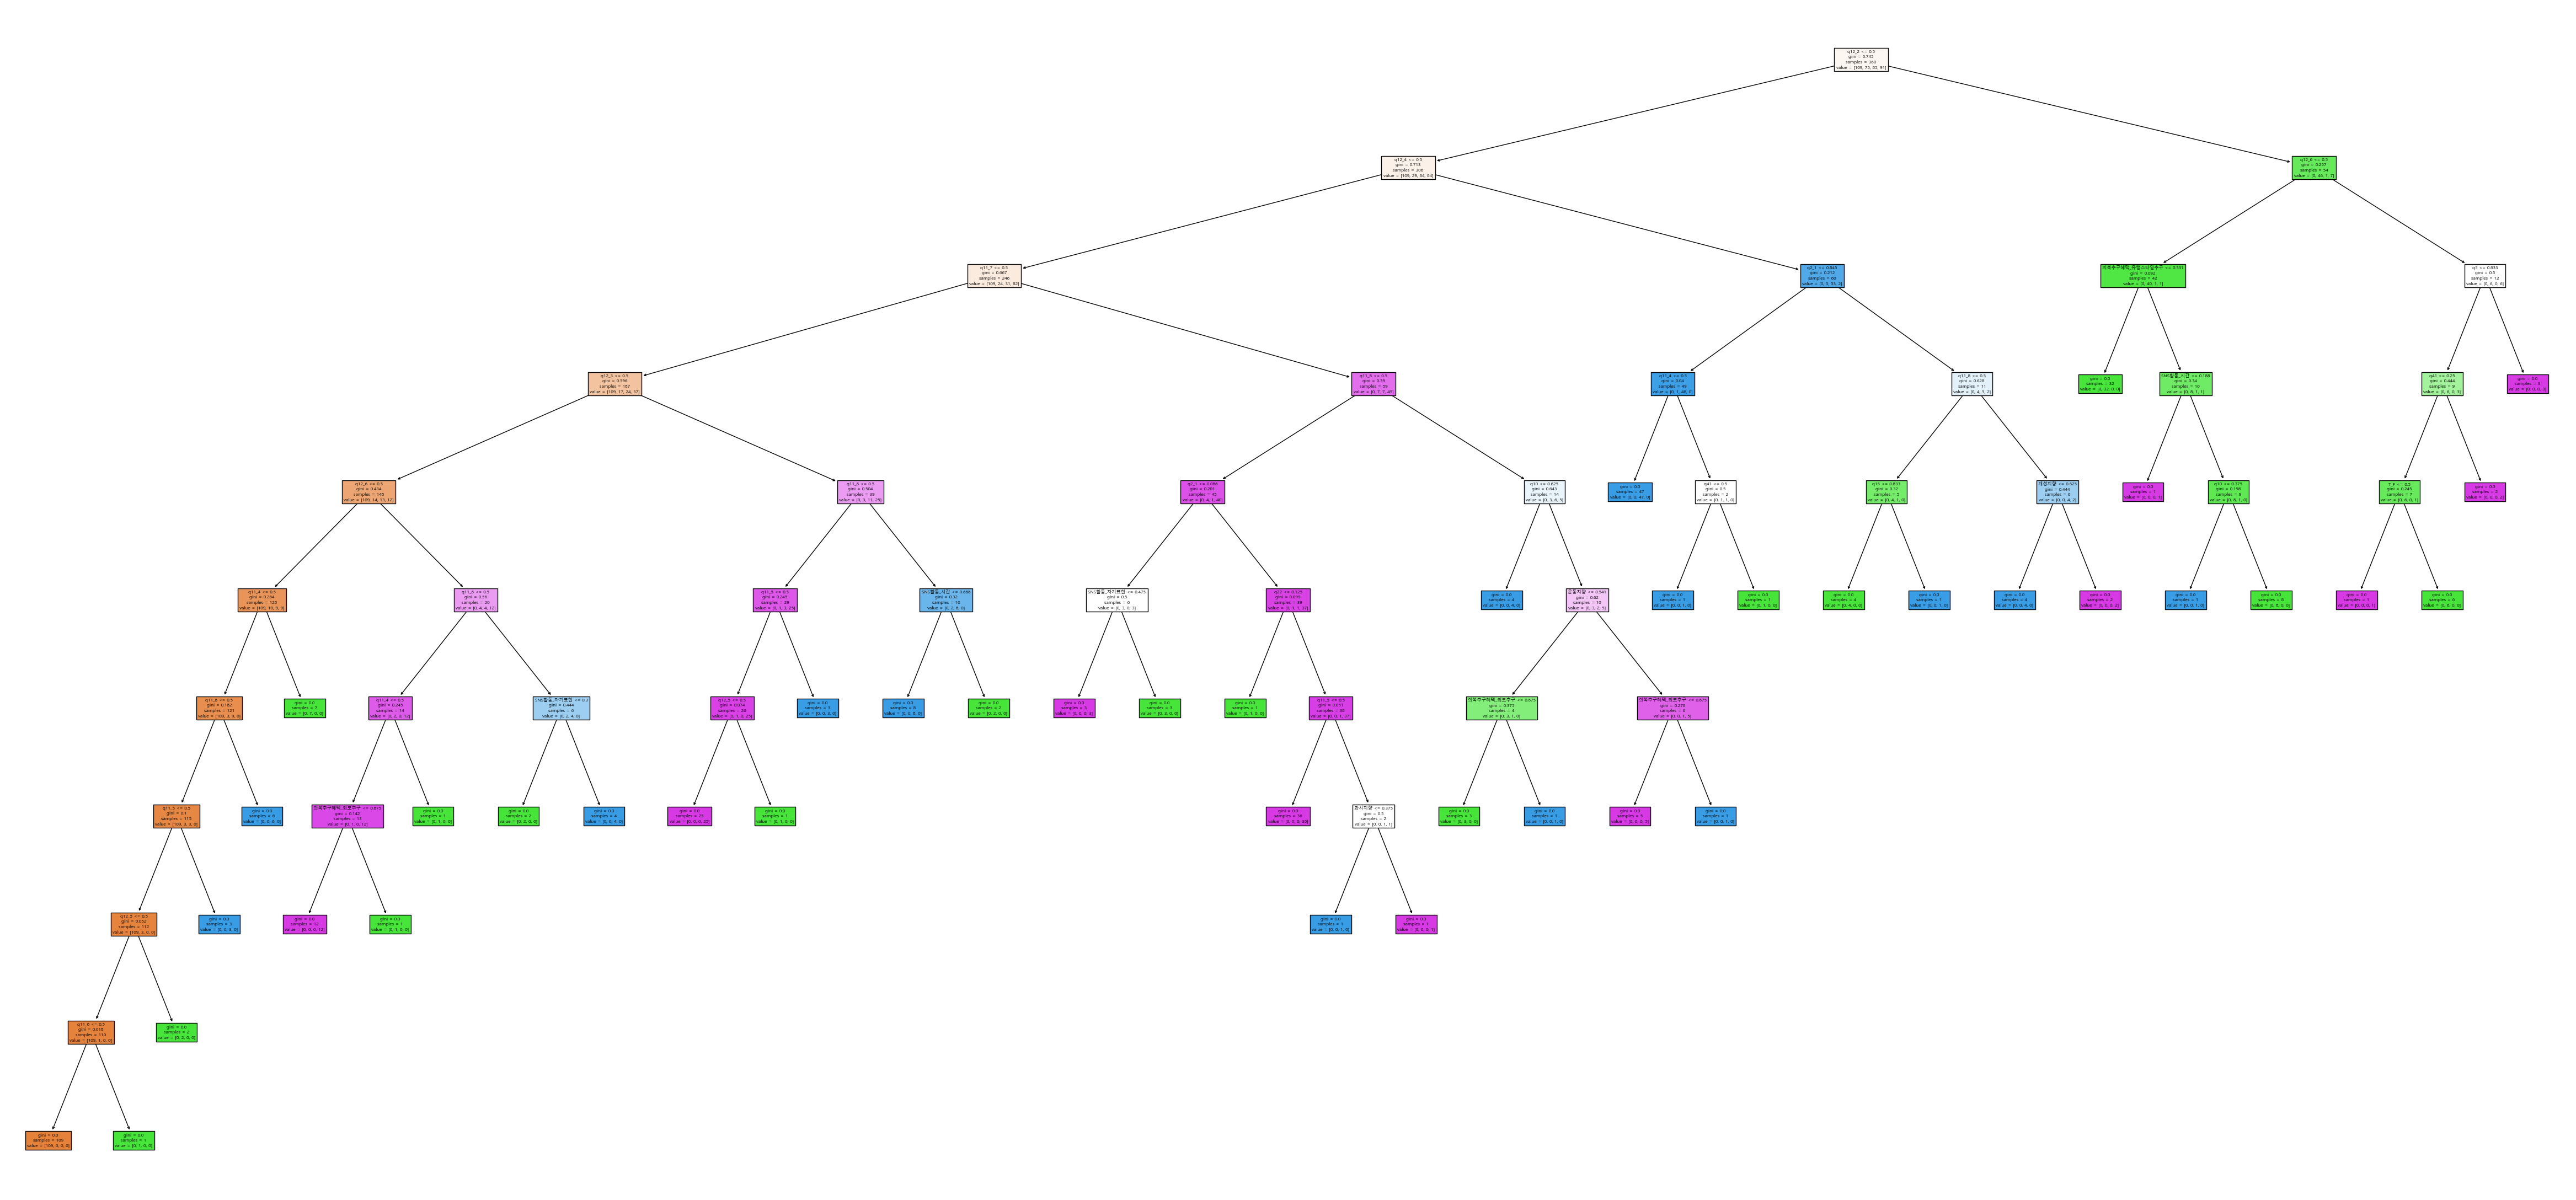

In [18]:
from sklearn.tree import plot_tree

plt.figure(dpi=2000)  # dpi를 300으로 설정 (높은 해상도)
plt.figure(figsize=(60,28))
plot_tree(dt, filled=True, feature_names=X_train.columns)   # full decision tree
plt.savefig('images/dt_fulldata.jpg')
plt.show()

In [19]:
# Feature_importance

feature_importance = dt.feature_importances_

# 각 피처의 중요도 출력
for feature, importance in zip(X_norm.columns, feature_importance):
    print(f"{feature}: {importance}")


q1: 0.0
q2_1: 0.022557727312532708
q3: 0.0
q5: 0.007454342154304885
I_E: 0.0
S_N: 0.0
T_F: 0.006389436132261331
J_P: 0.0
q7: 0.0
q8: 0.0
q9: 0.0
q10: 0.01706216093096451
q11_1: 0.0
q11_3: 0.0
q12_1: 0.0
q11_4: 0.05307905536119136
q11_6: 0.007386575407447591
q12_2: 0.13456549224236844
q12_5: 0.0215450781048992
q11_5: 0.04405102065658129
q11_8: 0.12139667133095812
q12_4: 0.15462258040615517
q11_7: 0.11027314755657747
q12_3: 0.1028472126452877
q12_6: 0.0870290898827052
q13_1: 0.0
q14_1: 0.0
q14_2: 0.0
q14_3: 0.0
q14_4: 0.0
q14_5: 0.0
q14_6: 0.0
q14_7: 0.0
q14_8: 0.0
q14_9: 0.0
q14_10: 0.0
q14_11: 0.0
q15: 0.005963473723443907
q16: 0.0
q17: 0.0
q18: 0.0
q19: 0.0
q21: 0.0
q22: 0.007077098118155851
q23: 0.0
q37: 0.0
q38: 0.0
q39: 0.0
q40: 0.0
q41: 0.01224641925350088
개성지향: 0.009939122872406512
과시지향: 0.0037271710771524425
운동지향: 0.011305752267362407
SNS활동_자기표현: 0.021120636103863836
SNS활동_시간: 0.01797324719426844
의복추구혜택_실용성: 0.0
의복추구혜택_유행스타일추구: 0.0017038496352696885
의복추구혜택_외모추구: 0.01868363963034

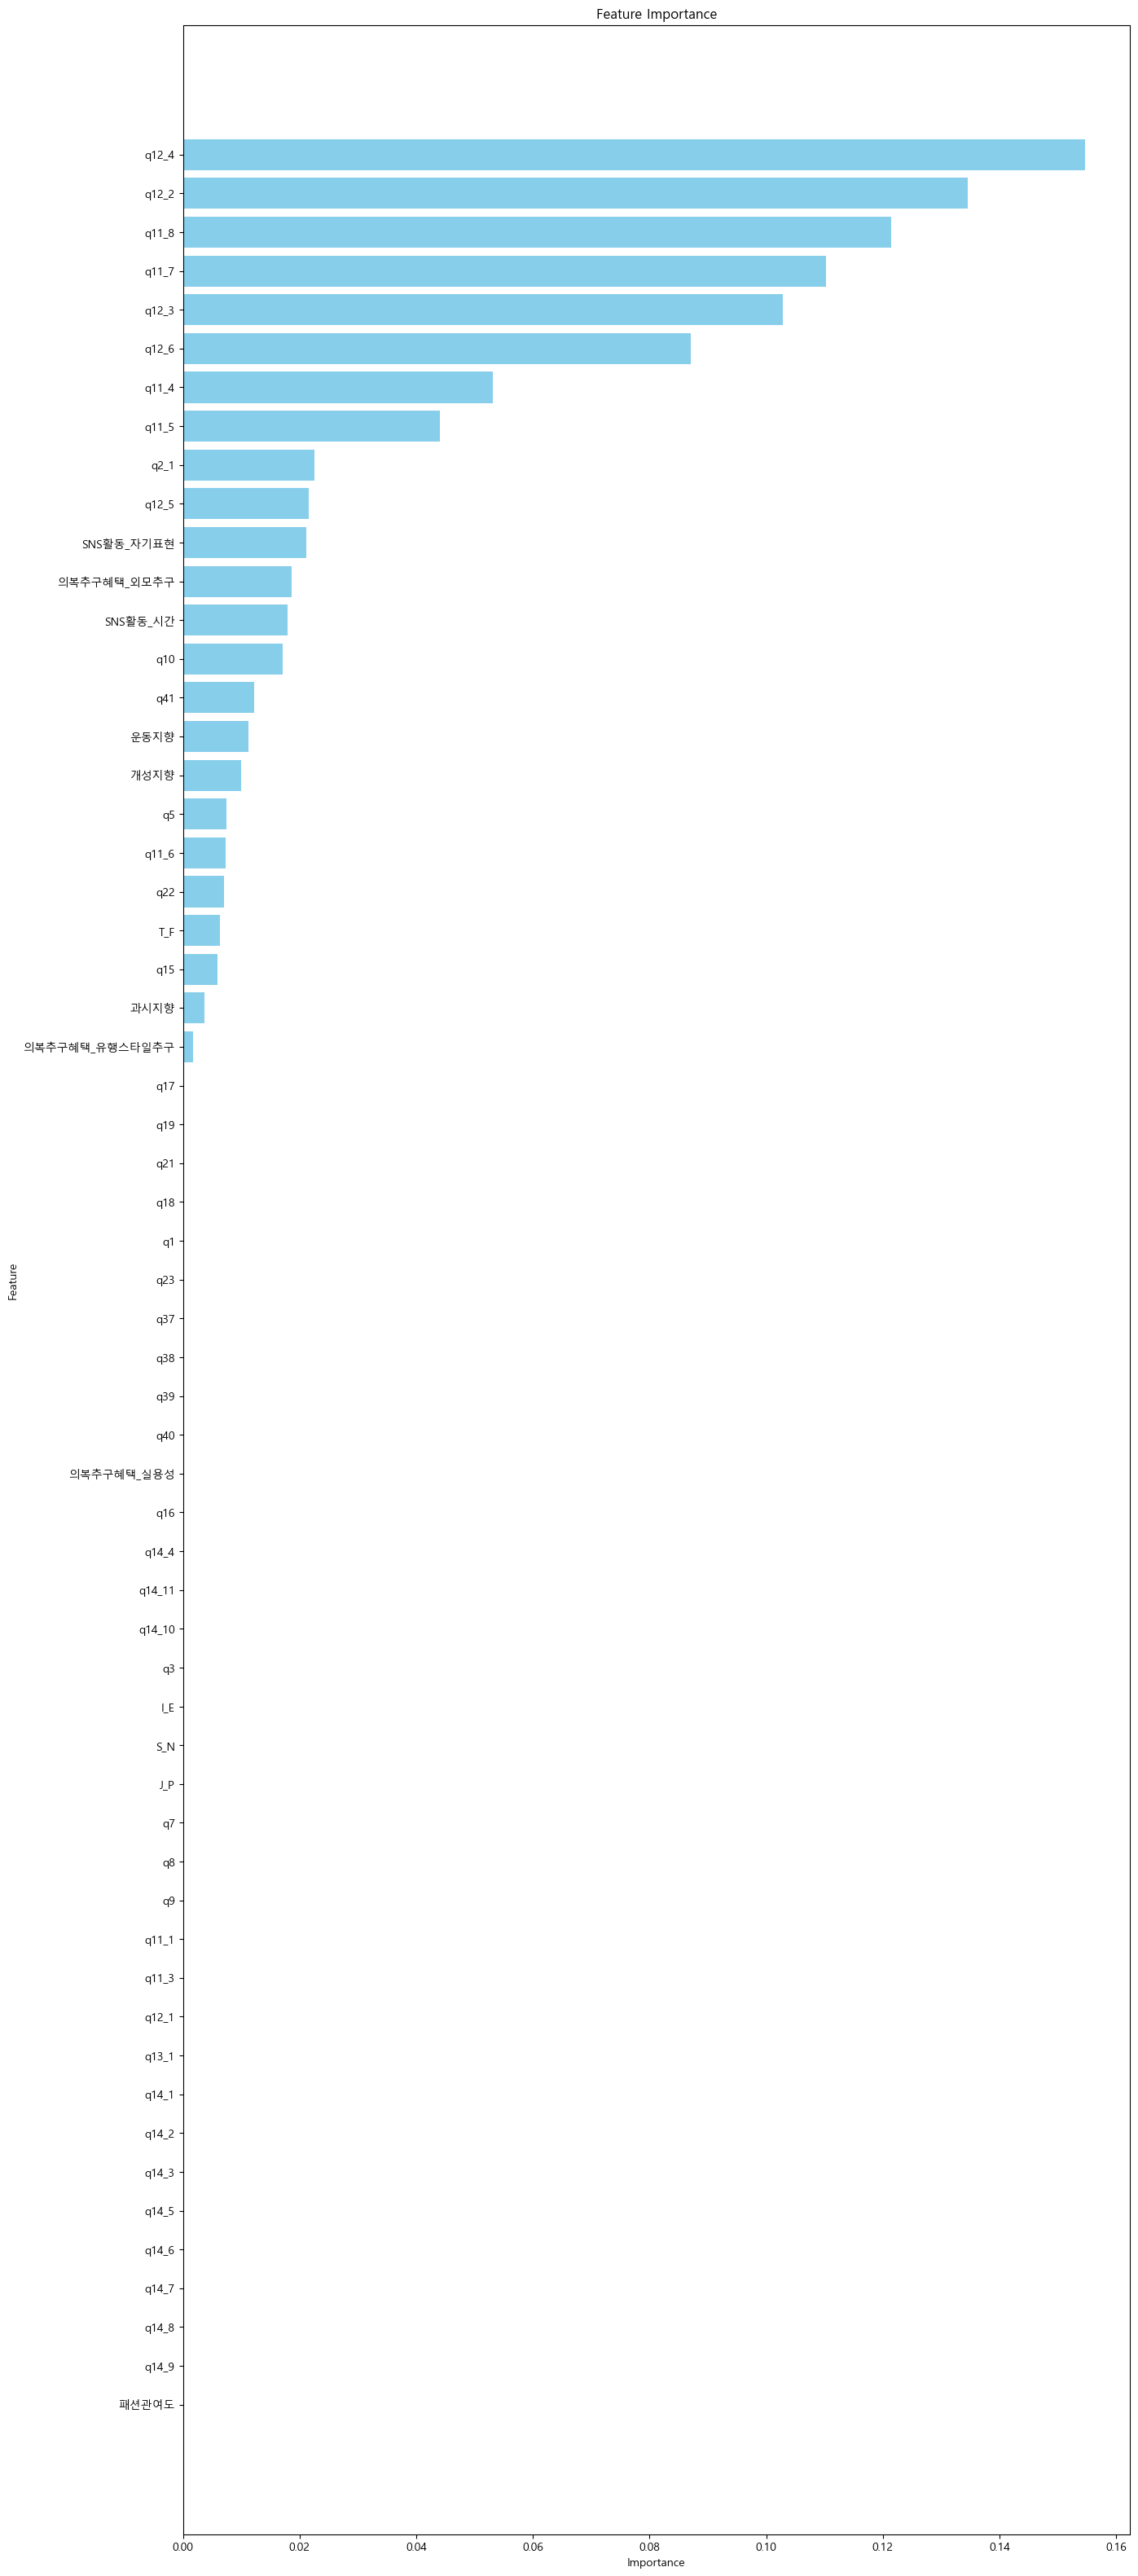

In [20]:
# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 중요도에 따라 내림차순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(15, 40))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오도록 뒤집기
plt.savefig('images/FeatureImportance_over80.jpg')
plt.show()

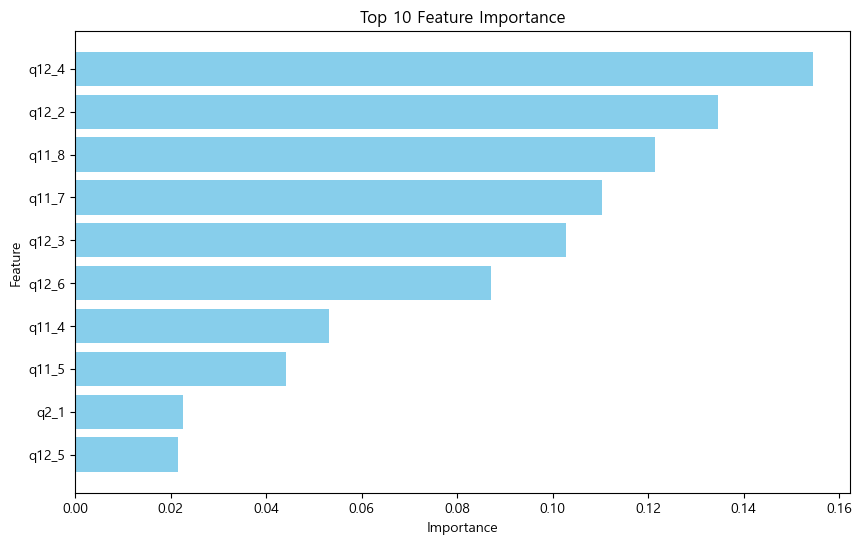

In [21]:
# 상위 10개의 피처만 선택
top_10_features = feature_importance_df.head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.savefig('images/Top10_FI_over80.jpg')
plt.show()